## 多項式回帰

In [12]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [13]:
# データセットを読み込み
from sklearn.datasets import load_boston # bostonデータを格納したクラス
boston = load_boston()                   # インスタンスを生成
# DataFrameを生成
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
df_target = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([df_data, df_target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
# 特徴量を抽出
lstat = df.loc[:, ['LSTAT']].values
rm = df.loc[:, ['RM']].values
y = df.loc[:, ['MEDV']].values

In [15]:
# ホールド・アウト法によるデータの分割
# random_stateを0に固定してあるので､毎回同じサンプルに分割
from sklearn.model_selection import train_test_split
lstat_train, lstat_test, y_train, y_test = train_test_split(lstat, y, test_size = 0.3, random_state = 0)
# 線形回帰のモデルを学習させる
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(lstat_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# ホールド・アウト法によるデータの分割
# random_stateを0に固定してあるので､毎回同じサンプルに分割
from sklearn.model_selection import train_test_split
lstat_train, lstat_test, y_train, y_test = train_test_split(lstat, y, test_size = 0.3, random_state = 0)
# 線形回帰のモデルを学習させる
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(lstat_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 多項式回帰用に変数変換をする PolynomialFeatures

In [17]:
from sklearn.preprocessing import PolynomialFeatures
#まずは基底の形状を定義
quad=PolynomialFeatures(degree=2)#default=2
X_quad=quad.fit_transform(lstat)

In [18]:
X_quad.shape

(506, 3)

In [21]:
X_quad_train,X_quad_test,y_quad_train,y_quad_test=train_test_split(X_quad,y,test_size=0.3,random_state=0)

In [22]:
model_quad=LinearRegression()
model_quad.fit(X_quad_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

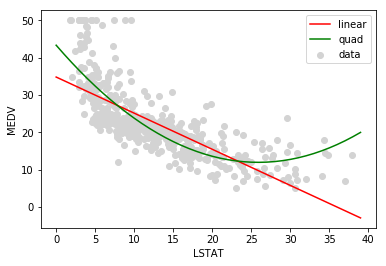

In [23]:
# 散布図に近似直線､近似曲線を重ねてみる
x = np.arange(0, 40, 1)[:, np.newaxis]  #列ベクトルにしないといけない　近似直線なのでxを網羅的に動かす。
plt.scatter(lstat, y, color='lightgray', label='data')               # 散布図を表示
plt.plot(x, model_lin.predict(x), color='red', label='linear')       # 回帰直線を表示
x_quad = quad.fit_transform(x)                                       # プロットのためのxも2変数変換する
plt.plot(x, model_quad.predict(x_quad), color='green', label='quad') # 回帰曲線を表示（2次関数）
plt.xlabel('LSTAT')                                                  # x軸のラベルを表示
plt.ylabel('MEDV')                                                   # y軸のラベルを表示
plt.legend(loc = 'upper right')                                      # 凡例を表示
plt.show()                                                           # 上記の内容でグラフを表示

np.hstackによって多項式基底に別の特徴量を加える。

In [24]:
# LSTAT（2次）にRMを加える
X_quad = np.hstack((X_quad, rm))
# ホールド・アウト法によるデータの分割
X_quad_train, X_quad_test, _, _ = train_test_split(X_quad, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_quad_2 = LinearRegression()
model_quad_2.fit(X_quad_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### 変数が2つなので二次元にプロットはできないーー＞残差プロットなら可視化できる。

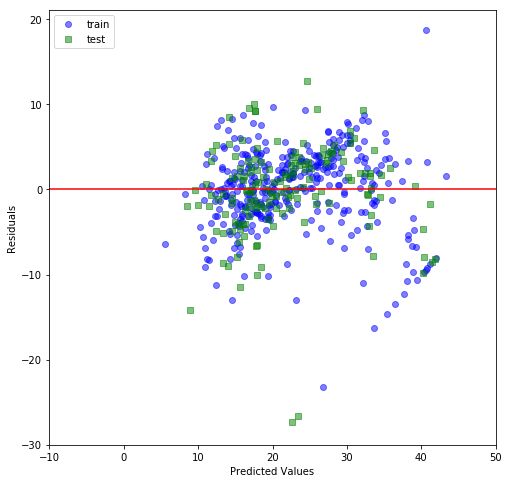

In [25]:
# 残差プロットを行う関数を定義
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-10, xmax=50, color='red') # 残差0の線を表示
    plt.xlim([-10, 50])                             # 表示する横軸の範囲を指定
    plt.show()
# 残差プロットを出力
# 線形回帰の場合
res_plot(y_quad_train, model_quad_2.predict(X_quad_train), y_quad_test, model_quad_2.predict(X_quad_test))

正則化を考える。

In [26]:
# 適当なデータセットを生成
# 中のコードは気にしなくていいので､今回はグラフだけ眺めてください

# 適当な三次関数を出力する関数を定義
def cubic(X):
    y = 0.0001 * (X**3 + X**2 + X + 1)
    return y

# サンプルデータの生成
np.random.seed(3)                         # 乱数生成器の状態を指定
X = np.random.normal(0, 10, 30)           # 正規分布に従って30個のデータ点を生成
y = cubic(X)                              # 対応するyを三次関数で指定
y += np.random.normal(0, 0.25, len(y))    # 正規分布に従うノイズを加える
X = X.reshape(-1, 1)                      # sklearnで扱えるように､一列のベクトルに変換

# 三次関数をプロットする用のデータを生成
X_plot = np.arange(-25, 25, 0.1)          # -25~+25の範囲に､0.1刻みでデータ点を取る
y_plot = cubic(X_plot)                    # 対応するyを三次関数で指定
X_plot = X_plot.reshape(-1, 1)            # sklearnで扱えるように､一行のベクトルに変換

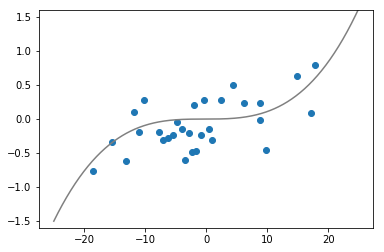

In [27]:
# グラフを描画
plt.scatter(X, y)                         # データ点をプロット
plt.plot(X_plot, y_plot, color='gray')    # もととなる三次関数を描画
plt.ylim([-1.6, 1.6])                     # 縦の表示範囲を指定
plt.show()                                # グラフを表

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

from sklearn.preprocessing import PolynomialFeatures
pol=PolynomialFeatures(degree=7)
X_pol=pol.fit_transform(X)

In [30]:
lr.fit(X_pol,y)
X_plot_pol = pol.fit_transform(X_plot)               # プロット用のデータも同様に変換
y_plot_pol = lr.predict(X_plot_pol)                  # プロット用のデータのyを予測

In [32]:
from sklearn.linear_model import Ridge
ridge_model=Ridge(alpha=1000) #alpha=L2ノルムの罰則の強さ
ridge_model.fit(X_pol,y) #7次に変換した特徴量でfit

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

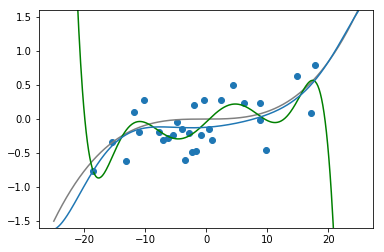

In [36]:
# グラフを描画
plt.scatter(X, y)                                              # データ点をプロット
plt.plot(X_plot, y_plot, color='gray')                         # もととなる三次関数を描画
plt.plot(X_plot, y_plot_pol, color='green')                    # 通常の多項式回帰のモデルを描画
plt.plot(X_plot, ridge_model.predict(X_plot_pol), color='red') # Ridge回帰によるモデルを描画

plt.ylim([-1.6, 1.6])                                          # 縦の表示範囲を指定
plt.show()                                                     # グラフを描画